In [1]:
from IPython.display import display_markdown
from xray_fov.paths import paths, outs
from xray_fov.data.dicom import dicom_directory
import matplotlib.pyplot as plt

In [2]:
for key, path in paths["dicom"].items():
    dicoms = dicom_directory(path)
    display_markdown(f"# {key}", raw=True)
    display(dicoms)

# phantom-alex

exposure_muas,file_path,filter_type,pixel_array,window_center,window_width
650,650.dcm,CU_0.3_MM,"[[471, 2824, 2825, 2834, 2826, 2835, 2820, 2811...",3715.0,500.0
710,710.dcm,CU_0.3_MM,"[[474, 2835, 2807, 2807, 2815, 2844, 2835, 2801...",3699.0,500.0
760,760.dcm,CU_0.3_MM,"[[470, 2817, 2825, 2785, 2818, 2829, 2803, 2817...",3673.0,500.0
840,840.dcm,CU_0.3_MM,"[[469, 2821, 2851, 2802, 2812, 2803, 2772, 2813...",3649.0,500.0
950,950.dcm,CU_0.3_MM,"[[473, 2834, 2823, 2815, 2780, 2796, 2818, 2789...",3618.0,500.0
1050,1050.dcm,CU_0.3_MM,"[[469, 2820, 2862, 2821, 2810, 2812, 2820, 2810...",3553.0,535.0
1150,1150.dcm,CU_0.3_MM,"[[466, 2791, 2788, 2818, 2774, 2755, 2783, 2743...",3523.0,595.0
1250,1250.dcm,CU_0.3_MM,"[[474, 2839, 2836, 2822, 2808, 2815, 2766, 2802...",3478.0,689.0
1390,1390.dcm,CU_0.3_MM,"[[472, 2831, 2821, 2777, 2804, 2800, 2766, 2737...",3412.0,817.0
1550,1550.dcm,CU_0.3_MM,"[[467, 2794, 2767, 2752, 2759, 2757, 2734, 2687...",3372.0,892.0


# phantom

# phantom-noxray

# air-noxray

# air

# phantom-alex

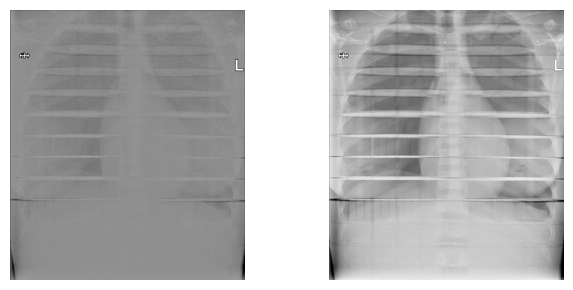

# phantom

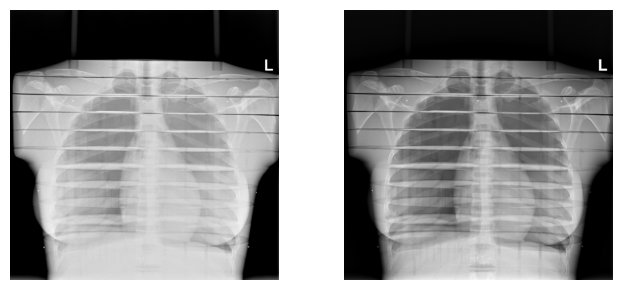

# phantom-noxray

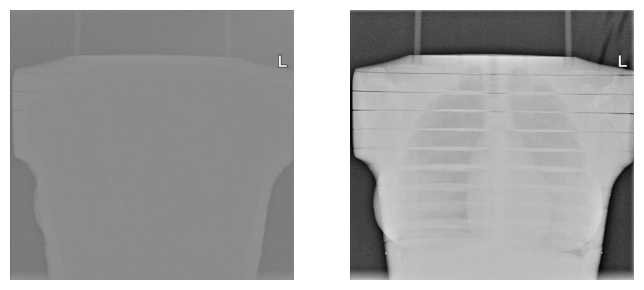

# air-noxray

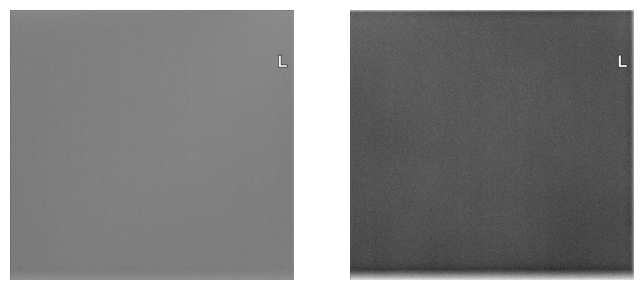

# air

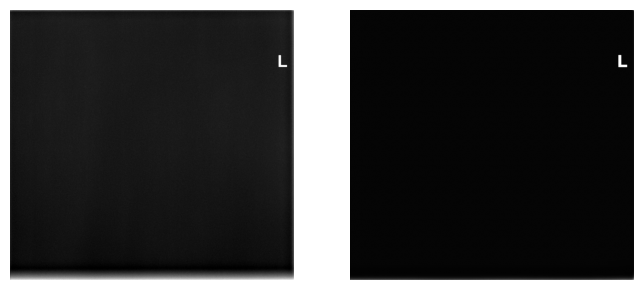

In [3]:
for key, path in paths["dicom"].items():
    dicoms = dicom_directory(path)
    display_markdown(f"# {key}", raw=True)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,3))
    if "noxray" in key:
        ax1.imshow(dicoms[-1]["clamped_pixel_array"], cmap='gray')
        ax2.imshow(dicoms[0]["clamped_pixel_array"], cmap='gray')
    else:
        ax1.imshow(dicoms[0]["clamped_pixel_array"], cmap='gray')
        ax2.imshow(dicoms[-1]["clamped_pixel_array"], cmap='gray')
    ax1.set_axis_off()
    ax2.set_axis_off()
    plt.tight_layout()
    plt.savefig(outs["phantom-air-noxray"]+f"/example-{key}.svg")
    plt.savefig(outs["phantom-air-noxray"]+f"/example-{key}.jpg")
    plt.show()

In [4]:
import cv2
for key, path in paths["dicom"].items():
    dicoms = dicom_directory(path)
    for index in range(dicoms["len"]):
        filename = f"{outs["single-phantoms"]}/{key}-{dicoms[index]["file_path"].split(".")[0]}"
        plt.imsave(filename+'.jpg', dicoms[index]["clamped_pixel_array"], cmap='gray')
        
        img = cv2.imread(filename+'.jpg')
        res = cv2.resize(img, dsize=None, fx=0.25, fy=0.25)
        cv2.imwrite(filename+'-small.jpg', res)